### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
#%run dataSampling.ipynb


LightGBM: LightGBM is a gradient boosting framework that efficiently builds decision trees in a leaf-wise manner. It is designed to be memory-efficient and fast, making it suitable for large-scale datasets and real-time applications.


In [2]:
import pandas as pd
import pickle

# Load the pickle file containing the DataFrame
with open('train_Data.pkl', 'rb') as trf:
    train_Data = pickle.load(trf)

In [3]:
with open('test_Data.pkl', 'rb') as trf:
    test_Data = pickle.load(trf)


In [4]:
import pandas as pd
import numpy as np
import multiprocessing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from time import time
import datetime
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score

# for modeling 
import sklearn
from lightgbm import LGBMClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, plot_roc_curve, roc_curve, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets, metrics
from sklearn.decomposition import PCA


In [5]:
X = train_Data.drop(['isFraud'], axis=1)
y = train_Data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [6]:
lgb = LGBMClassifier(
          max_bin = 63,
          num_leaves = 255,
          num_iterations = 500,
          learning_rate = 0.01,
          tree_learner = 'serial',
          is_dfing_metric = False,
          min_data_in_leaf = 1,
          min_sum_hessian_in_leaf = 100,
          sparse_threshold=1.0,
          # device = 'gpu',
          num_thread = -1,
          save_binary= True,
          seed= 42,
          feature_fraction_seed = 42,
          bagging_seed = 42,
          drop_seed = 42,
          data_random_seed = 42,
          objective = 'binary',
          boosting_type = 'gbdt',
          verbose = 1,
          metric = 'auc',
          is_unbalance = True,
          boost_from_average = False)

In [7]:
lgb.fit(X_train, y_train)

/opt/conda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

LGBMClassifier(bagging_seed=42, boost_from_average=False, data_random_seed=42,
               drop_seed=42, feature_fraction_seed=42, is_dfing_metric=False,
               is_unbalance=True, learning_rate=0.01, max_bin=63, metric='auc',
               min_data_in_leaf=1, min_sum_hessian_in_leaf=100,
               num_iterations=500, num_leaves=255, num_thread=-1,
               objective='binary', save_binary=True, seed=42,
               sparse_threshold=1.0, tree_learner='serial', verbose=1)

In [8]:
gc.collect()

47

In [9]:
y_pred = lgb.predict(X_test)

[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100


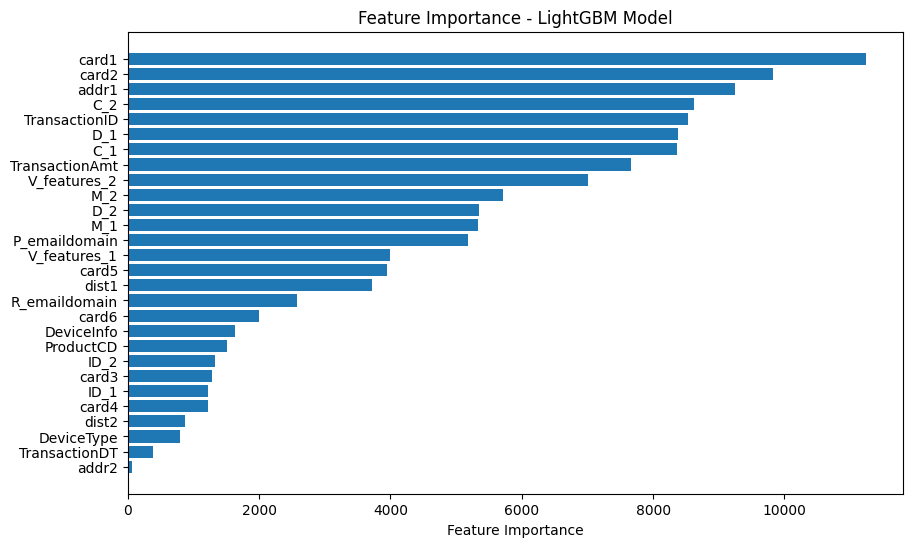

In [10]:
feature_importance = lgb.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort the features and their importance scores
sorted_idx = np.argsort(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - LightGBM Model')
plt.show()

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95    113866
         1.0       0.27      0.81      0.41      4242

    accuracy                           0.92    118108
   macro avg       0.63      0.87      0.68    118108
weighted avg       0.97      0.92      0.94    118108



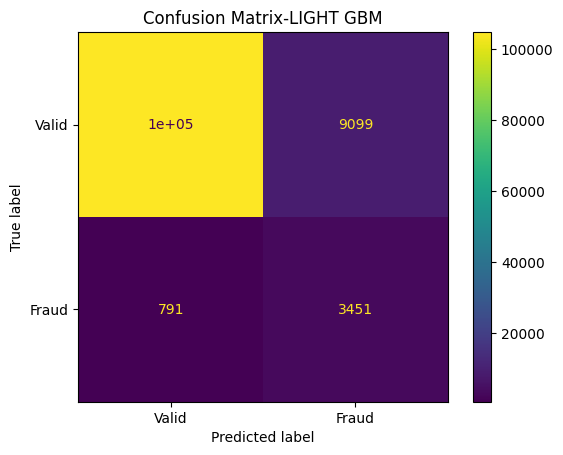

<Figure size 300x400 with 0 Axes>

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Assuming you have y_true and y_pred for the test data
# y_true: True labels for test data
# y_pred: Predicted labels for test data

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix using ConfusionMatrixDisplay
dispp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Valid', 'Fraud'])
dispp.plot()
plt.title("Confusion Matrix-LIGHT GBM")
plt.figure(figsize=(3, 4))

#plt.grid(None)
#plt.show()
print(classification_report(y_test, y_pred, zero_division=0))

In [12]:
print('Test ROC AUC score:', roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1]))
print('Train ROC AUC score:', roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1]))

[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
Test ROC AUC score: 0.9405274616905173
[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
Train ROC AUC score: 0.9729462051232567


[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1


/opt/conda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1429
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 28
[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored.

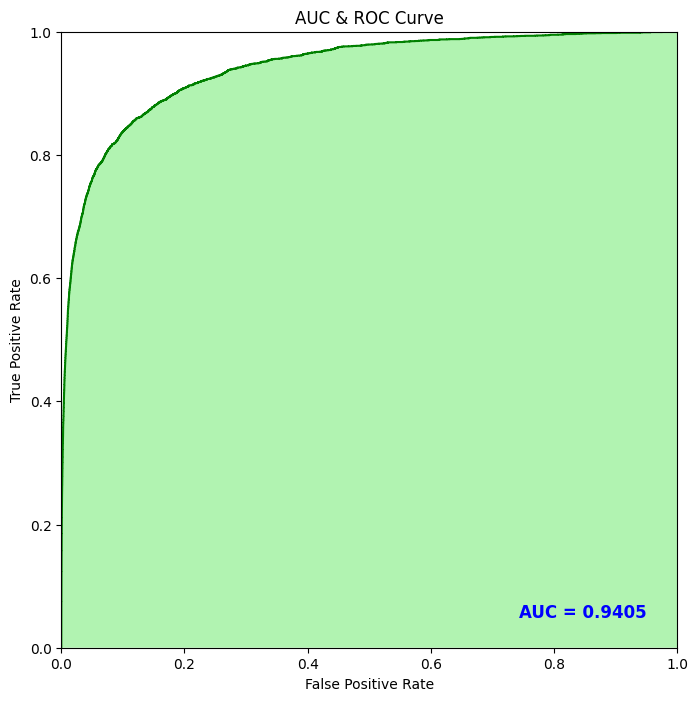

In [13]:
from sklearn import metrics

lgb.fit(X_train, y_train)
y_pred = lgb.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

/opt/conda/lib/python3.8/site-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

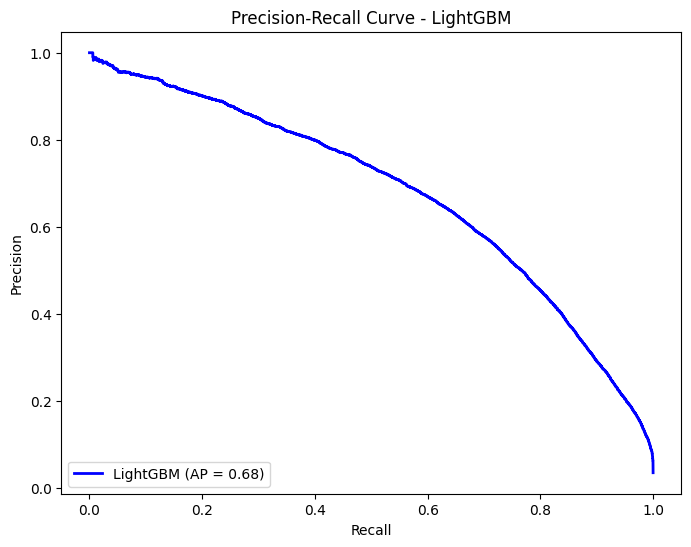

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Step 1: Train the LightGBM classifier on the training data
lgb.fit(X_train, y_train)

# Step 2: Predict the anomaly scores (probability of positive class) on the training data
anomaly_scores_train = lgb.predict_proba(X_train)[:, 1]

# Step 3: Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, anomaly_scores_train)

# Step 4: Calculate average precision score
average_precision = average_precision_score(y_train, anomaly_scores_train)

# Step 5: Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f"LightGBM (AP = {average_precision:.2f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - LightGBM')
plt.legend(loc="lower left")
plt.show()


In [15]:
sub= pd.read_csv(r'sample_submission.csv')

In [16]:
sub['isFraud']=pd.DataFrame(lgb.predict_proba(test_Data))[[1]]

[LightGBM] [Warning] Unknown parameter: sparse_threshold
[LightGBM] [Warning] Unknown parameter: is_dfing_metric
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=100, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=100


In [17]:
sub.to_csv('./submission.csv',index=False)

In [18]:
sub.head()

,TransactionID,isFraud
0,3663549,0.029778
1,3663550,0.078977
2,3663551,0.183424
3,3663552,0.202641
4,3663553,0.094104
